Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') 

Data Collection

In [52]:
Rainfall_Data=pd.read_csv('Rainfall.csv')
Rainfall_Data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


Data Preprocessing

In [53]:
Rainfall_Data.shape

(366, 12)

In [54]:
Rainfall_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [55]:
Rainfall_Data.columns=Rainfall_Data.columns.str.strip()

In [56]:
Rainfall_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [57]:
Rainfall_Data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [58]:
Rainfall_Data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [59]:
Rainfall_Data.dropna(inplace=True)

In [60]:
Rainfall_Data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [61]:
Rainfall_Data.replace({'rainfall':{'yes':1,'no':0}},inplace=True)

In [62]:
Rainfall_Data['rainfall'].value_counts()

rainfall
1    248
0    117
Name: count, dtype: int64

In [63]:
Rainfall_Data['Rainfall']=Rainfall_Data['rainfall']
Rainfall_Data.drop('rainfall',axis=1,inplace=True)

<Axes: >

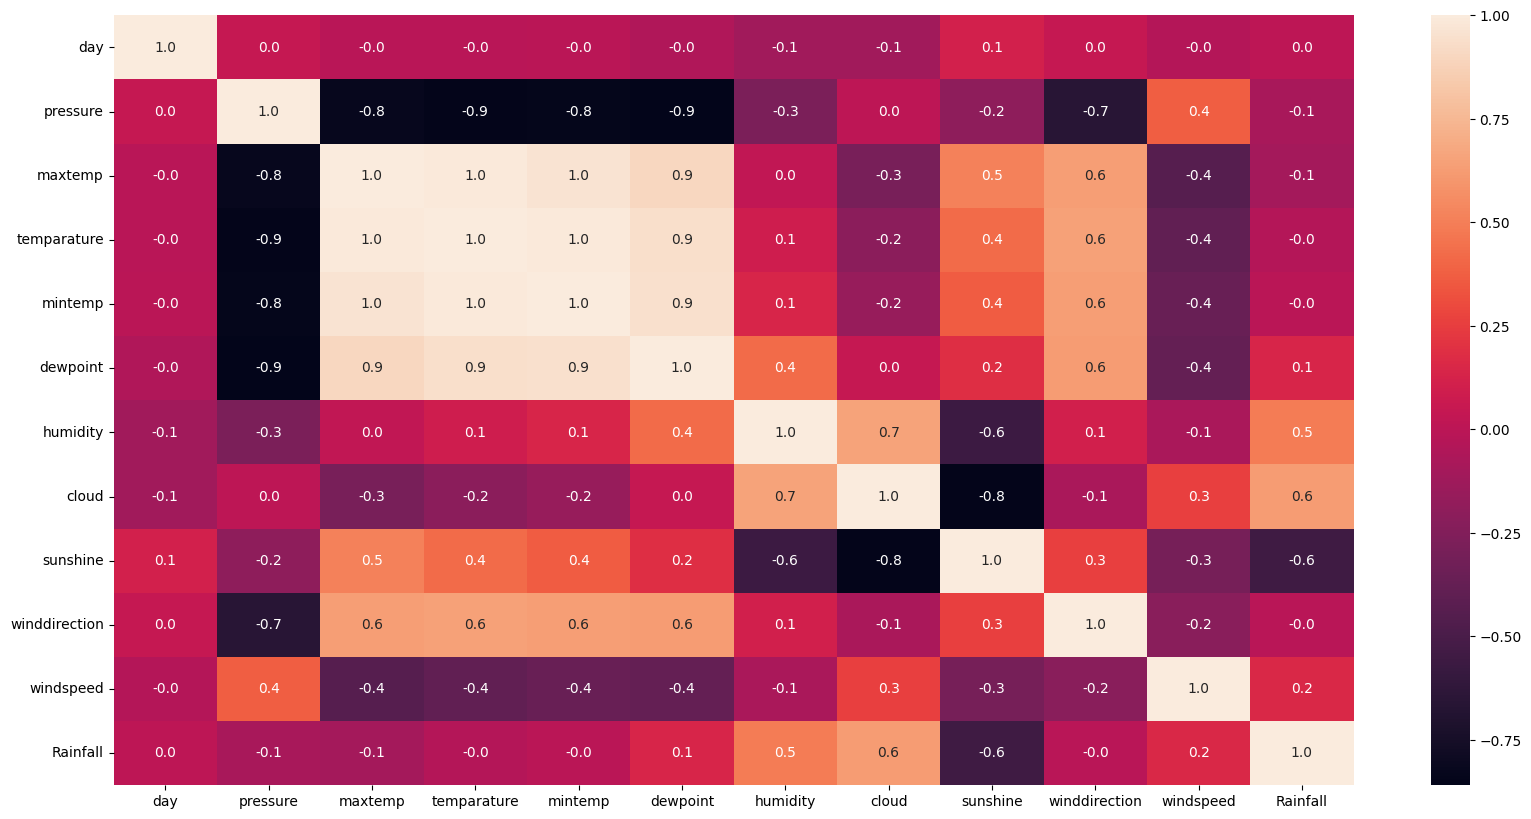

In [64]:
plt.figure(figsize=(20,10))
corr=Rainfall_Data.corr()
sns.heatmap(data=corr,annot=True,fmt='.1f')

<Axes: xlabel='Rainfall', ylabel='count'>

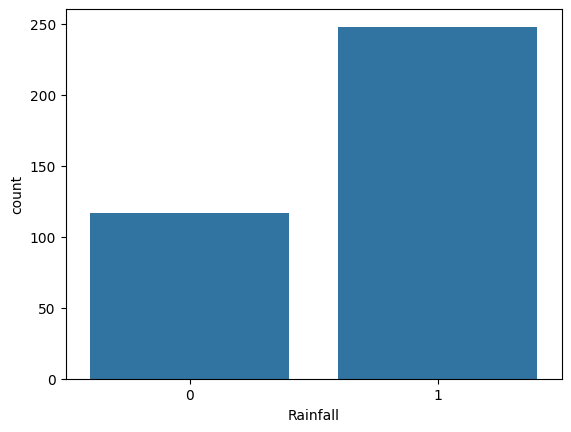

In [65]:
sns.countplot(x=Rainfall_Data['Rainfall'])

ValueError: num must be an integer with 1 <= num <= 9, not 10

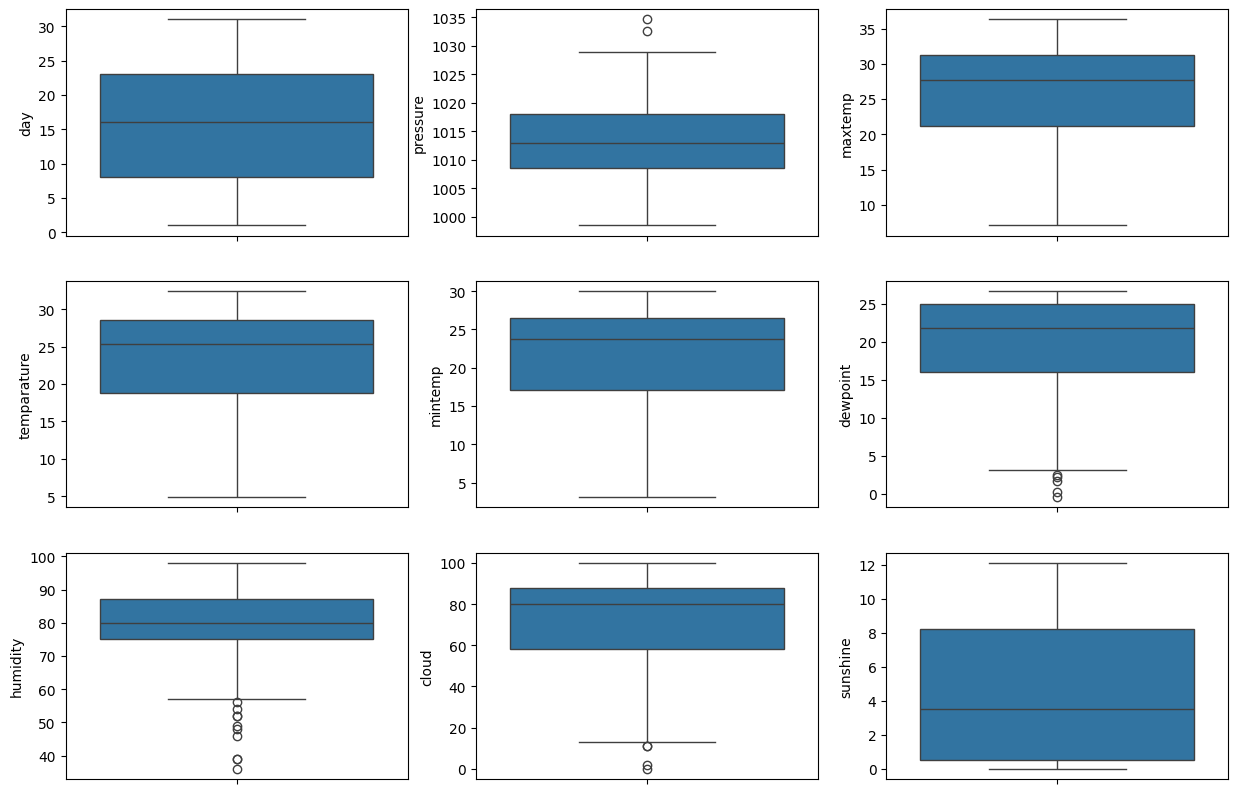

In [67]:
plt.figure(figsize=(15,10))
for i,column in enumerate(Rainfall_Data.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=Rainfall_Data[column])
plt.tight_layout
plt.show

ValueError: num must be an integer with 1 <= num <= 9, not 10

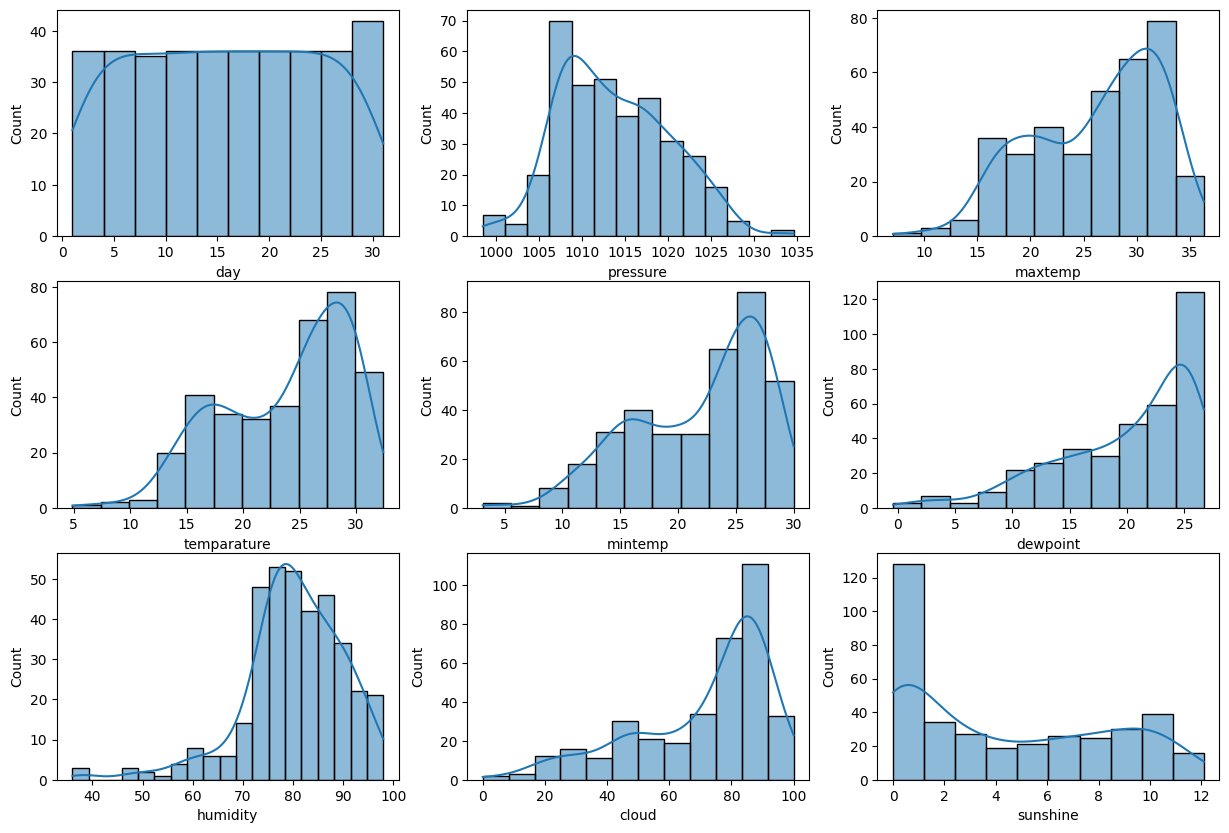

In [68]:
plt.figure(figsize=(15,10))
for i,column in enumerate(Rainfall_Data.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data=Rainfall_Data[column],kde=True)
plt.tight_layout
plt.show

In [69]:
Rainfall_Data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


In [70]:
yes=Rainfall_Data[Rainfall_Data['Rainfall']==1]
no=Rainfall_Data[Rainfall_Data['Rainfall']==0]

print(yes.shape)
print(no.shape)

(248, 12)
(117, 12)


In [71]:
yes=yes.sample(117)
print(yes.shape)

(117, 12)


In [72]:
Rainfall_Data_Sampled=pd.concat([yes,no])
Rainfall_Data_Sampled.shape

(234, 12)

In [73]:
Rainfall_Data_Sampled['Rainfall'].value_counts()

Rainfall
1    117
0    117
Name: count, dtype: int64

Train Test Split

In [74]:
X=Rainfall_Data_Sampled.drop(columns=['day','Rainfall'],axis=1)
Y=Rainfall_Data_Sampled['Rainfall']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 10)
(24, 10)
(210,)
(24,)


Model Building

In [76]:
Model=RandomForestClassifier()
Model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
y_train_pred=Model.predict(x_train)
accscr=accuracy_score(y_train,y_train_pred)
print(accscr)

1.0


In [79]:
y_pred=Model.predict(x_test)
accscr=accuracy_score(y_test,y_pred)
print(accscr)

0.875


Predictive Mechanism

In [ ]:
input1=np.array([1011.4,28.2,25.8,23.2,23.4,87,82,2.7,40,9.2]).reshape(1,-1)
input2=np.array([1008.5,33.2,30.6,29,26.2,78,69,9.2,230,23.7]).reshape(1,-1)

pred1=Model.predict(input1)
pred2=Model.predict(input2)

print(pred1) #yes #1
print(pred2) #no #0

[1]
[0]
